# Bike Rental

## Data Information

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.


## Data description
The business meaning of each column in the data is as below

season: The current season (1:winter, 2:spring, 3:summer, 4:fall)

yr: year (0: 2011, 1:2012)

mnth: month ( 1 to 12)

hr: hour of the day (0 to 23)

holiday: weather day is holiday or not

weekday: day of the week

workingday: if day is neither weekend nor holiday is 1, otherwise is 0

weathersit: The Weather forecast for the day
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp: Normalized temperature in Celsius.

atemp: Normalized feeling temperature in Celsius.

hum: Normalized humidity. The values are divided to 100 (max)

windspeed: Normalized wind speed. The values are divided to 67 (max)

casual: count of casual users

registered: count of registered users

cnt: count of total rental bikes including both casual and registered

## Necessary Libaray

In [1]:
import numpy as np
import datetime as dt
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import os
import warnings
warnings.filterwarnings('ignore')

##  Loading Data

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#from google.colab import files
#uploaded = files.upload()

In [4]:
bike=pd.read_csv('hour.csv')

In [5]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## Basic Checks

In [6]:
# Shape of data
bike.shape

(17379, 17)

• The given data has 17379 rows and 17 columns

In [7]:
# First five rows of data
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
# Last five rows of data
bike.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,31-12-2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,31-12-2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,31-12-2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,31-12-2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,31-12-2012,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [9]:
# state of data
bike.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Insites 

• By bike.describe(), several key insights can be derived from the statistical measures and values presented for each feature 

• Count: The dataset contains 17,379 records.

• Instant: This column represents a unique identifier for each record and does not provide any statistical summary.

• Season: The average season value is approximately 2.50, with a minimum of 1 and a maximum of 4. This suggests that there are four distinct seasons in the dataset.

• Year (yr): The average year value is approximately 0.50, indicating a roughly equal distribution between two years. The minimum is 0, and the maximum is 1.

• Month (mnth): The average month value is approximately 6.54, ranging from 1 to 12.

• Hour (hr): The average hour value is approximately 11.55, with a minimum of 0 and a maximum of 23. This suggests that the dataset records bike rentals throughout the day.

• Holiday: On average, the holiday column has a very low value (0.03), indicating that most records are not associated with holidays. The minimum value is 0, and the maximum is 1.

• Weekday: The average weekday value is approximately 3, suggesting that the dataset covers all days of the week. The minimum value is 0 (presumably Sunday), and the maximum is 6 (presumably Saturday).

• Workingday: On average, the workingday column has a value of approximately 0.68, indicating that there are more non-working days than working days in the dataset. The minimum value is 0, and the maximum is 1.

• Weathersit: The average weather situation value is approximately 1.43, with a minimum of 1 and a maximum of 4. This likely represents different weather conditions, with 1 being the best and 4 being the worst.

• Temp: The average temperature is approximately 0.50, with a minimum of 0.02 and a maximum of 1.00.

• Atemp: The average "feels like" temperature is approximately 0.48, with a minimum of 0.00 and a maximum of 1.00.

• Humidity (hum): The average humidity is approximately 0.63, with a minimum of 0.00 and a maximum of 1.00.

• Windspeed: The average windspeed is approximately 0.19, with a minimum of 0.00 and a maximum of 0.85.

• Casual: The average number of casual bike rentals is approximately 35.68, with a minimum of 0 and a maximum of 367.

• Registered: The average number of registered bike rentals is approximately 153.79, with a minimum of 0 and a maximum of 886.

• Count (cnt): The average count of total bike rentals is approximately 189.46, with a minimum of 1 and a maximum of 977.



In [10]:
# datatypes of all features
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


• Insites

• The bike.info() function provides an overview of the dataset, including information about the data types and memory usage.This information is crucial for understanding the structure and characteristics of the dataset, which is essential for data preprocessing, analysis, and modeling tasks.
• Number of Rows-17379
• Columns: 17
• Data Types: Integer (int64):  12 columns ;Float (float 64) :4 columns ; Object (string): 1 column(dteday)




In [11]:
# Finding unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
bike.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

• Insites

• The bike.nunique() function provides the count of unique values for each column in the dataset. These unique value counts provide insights into the diversity and distribution of data within each column, which can be valuable for understanding the dataset's characteristics and conducting further analysis


In [12]:
correlation_matrix = bike.corr()

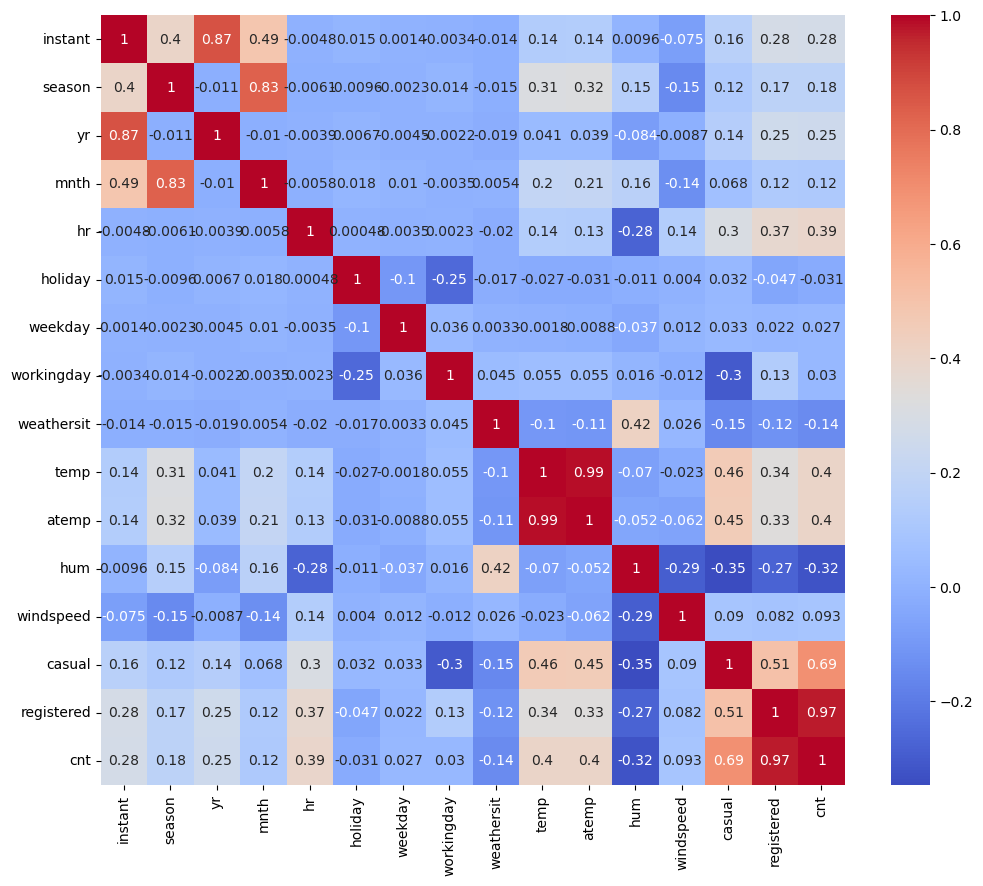

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()


Correlation matrix can help determine whether to drop or remove unused or unrelated features in a dataset by examining the relationships between features (variables). The idea is to identify features that are highly correlated with each other or have low correlations with the target variable, as such features may not provide much additional information and may even introduce multicollinearity, which can lead to overfitting in certain models.
Created Heatmap to visualize the Correlation Matrix,Heatmaps make it easy to spot correlations at a glance, where dark cells represent strong correlations, and light cells represent weak correlations or no correlation.

Look for pairs of features that have high positive or negative correlations (e.g., |correlation| > 0.7 or a threshold you define). High positive correlations indicate that the features are closely related and might carry redundant information. High negative correlations may also indicate redundancy if the relationship is strong.


Evaluate Correlations with the Target ,Besides examining feature-feature correlations, assess the correlations between features and the target variable. Features with low absolute correlation with the target might not contribute much predictive power.

Based on your analysis, decide which features to remove. You can choose to drop one of each highly correlated pair or eliminate features with low correlations with the target.

In [14]:
# Taking Important feature and removing highly correlated  features
bike1=bike.drop(['instant','dteday','registered','casual','yr','mnth','atemp'],axis=1)

In [15]:
# datatypes of all features
bike1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   hr          17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   weekday     17379 non-null  int64  
 4   workingday  17379 non-null  int64  
 5   weathersit  17379 non-null  int64  
 6   temp        17379 non-null  float64
 7   hum         17379 non-null  float64
 8   windspeed   17379 non-null  float64
 9   cnt         17379 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 1.3 MB


In [16]:
#Unique value of categorical feature
category_features=['season','holiday','hr','weekday','workingday','weathersit']
for col in category_features:
    print(f"{col}",bike1[col].unique())

season [1 2 3 4]
holiday [0 1]
hr [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
weekday [6 0 1 2 3 4 5]
workingday [0 1]
weathersit [1 2 3 4]


In [17]:
# datatypes of all features
bike1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   hr          17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   weekday     17379 non-null  int64  
 4   workingday  17379 non-null  int64  
 5   weathersit  17379 non-null  int64  
 6   temp        17379 non-null  float64
 7   hum         17379 non-null  float64
 8   windspeed   17379 non-null  float64
 9   cnt         17379 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 1.3 MB


In [18]:
# Identify the data types of columns
data_types = bike1.dtypes

# Separate categorical and numeric features
categorical_features = data_types[data_types == 'object'].index.tolist()
numeric_features = data_types[data_types != 'object'].index.tolist()

# Count the number of categorical and numeric features
num_categorical_features = len(categorical_features)
num_numeric_features = len(numeric_features)

# Print the results
print(f"Number of Categorical Features: {num_categorical_features}")
print(f"Number of Numeric Features: {num_numeric_features}")


Number of Categorical Features: 0
Number of Numeric Features: 10


### Insights/Obervation:-

* Shape of Data set is 17379 rows and 12 features
* No null value present in dataset.
* No constant value present in dataset.
* In dataset have 12 numeric feature.

## Data visualization

### Univariate analysis

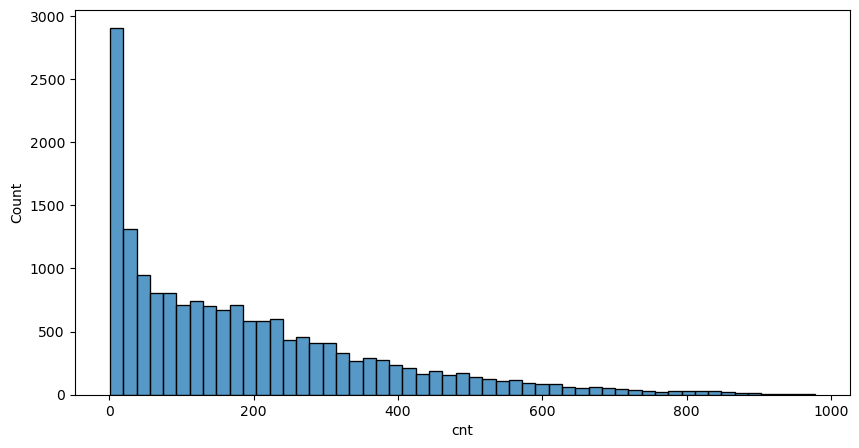

In [19]:
# Target variabel
plt.figure(figsize=(10,5))
sns.histplot(bike1['cnt'])
plt.show()


* minimum count is one and maximum count is 977.
* average is  between one to 200.

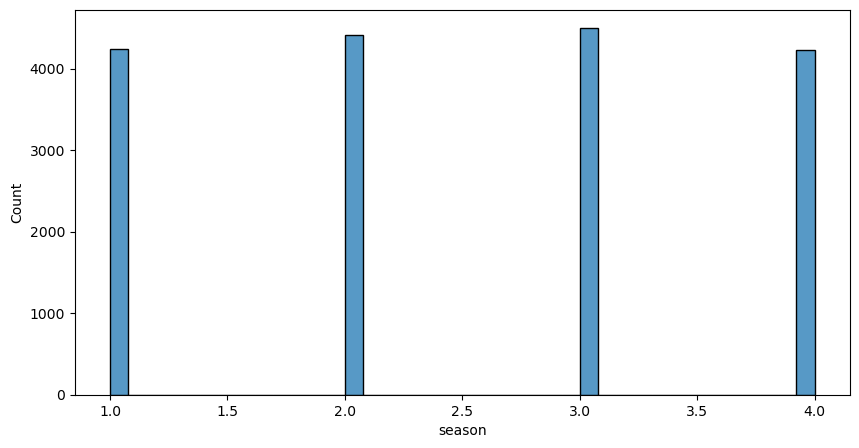

In [20]:
# season variabel
# season (1:winter, 2:spring, 3:summer, 4:fall)
plt.figure(figsize=(10,5))
sns.histplot(bike1['season'])
plt.show()

* In all records summer record is highest

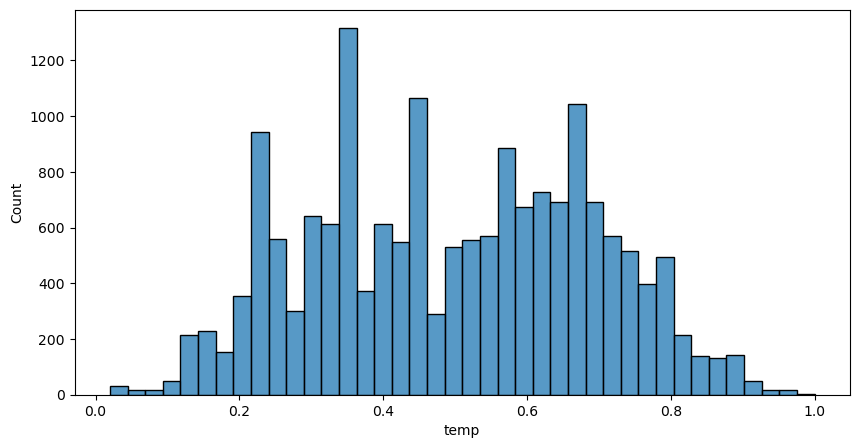

In [21]:
# temp variabel
plt.figure(figsize=(10,5))
sns.histplot(bike1['temp'])
plt.show()

* Data look like normally distributed.
* Maximum temp is one.
* most data have temp 0.3 to 0.4.

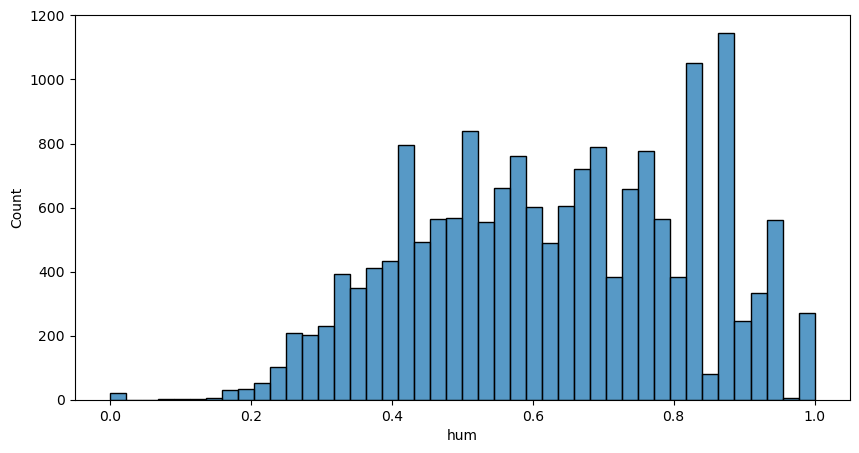

In [22]:
# hum variabel
plt.figure(figsize=(10,5))
sns.histplot(bike1['hum'])
plt.show()

* humidity split between zero to one.
* most deta lie humidity range between 0.45 0.6.

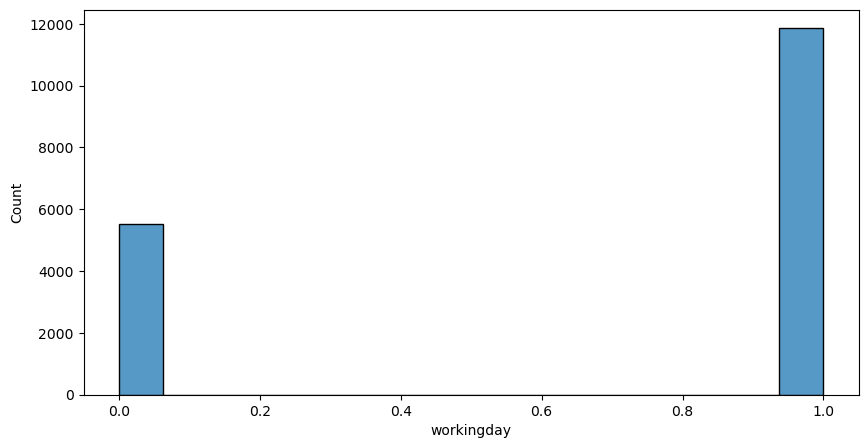

In [23]:
# workingday variabel
plt.figure(figsize=(10,5))
sns.histplot(bike1['workingday'])
plt.show()

* Not holiday or not weekend record is more.

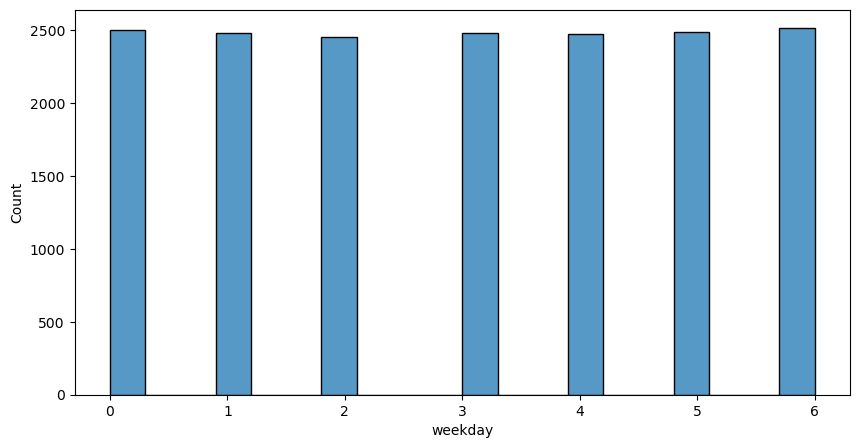

In [24]:
# weekday variabel
plt.figure(figsize=(10,5))
sns.histplot(bike1['weekday'])
plt.show()

* All weekday have look like a balanced data.

### Bivariate Multivariate Analysis

<Axes: xlabel='hum', ylabel='cnt'>

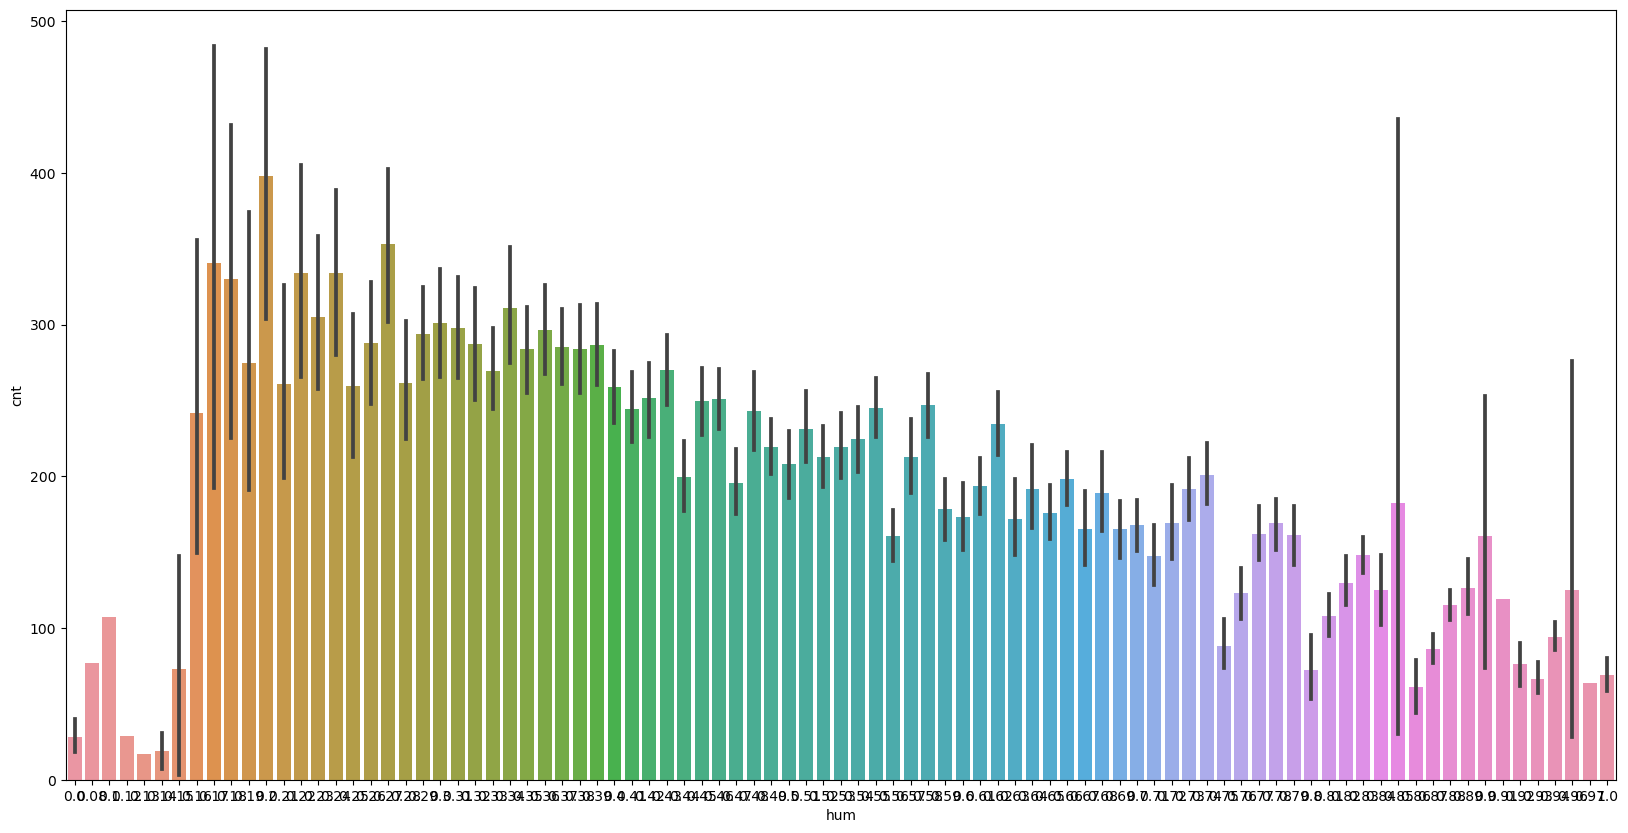

In [25]:
plt.figure(figsize=(20,10))
sns.barplot(x='hum',y='cnt',data=bike1)

* If humidity is increased count is decrease there is a negative correlation between humidity and count.

<Axes: xlabel='season', ylabel='cnt'>

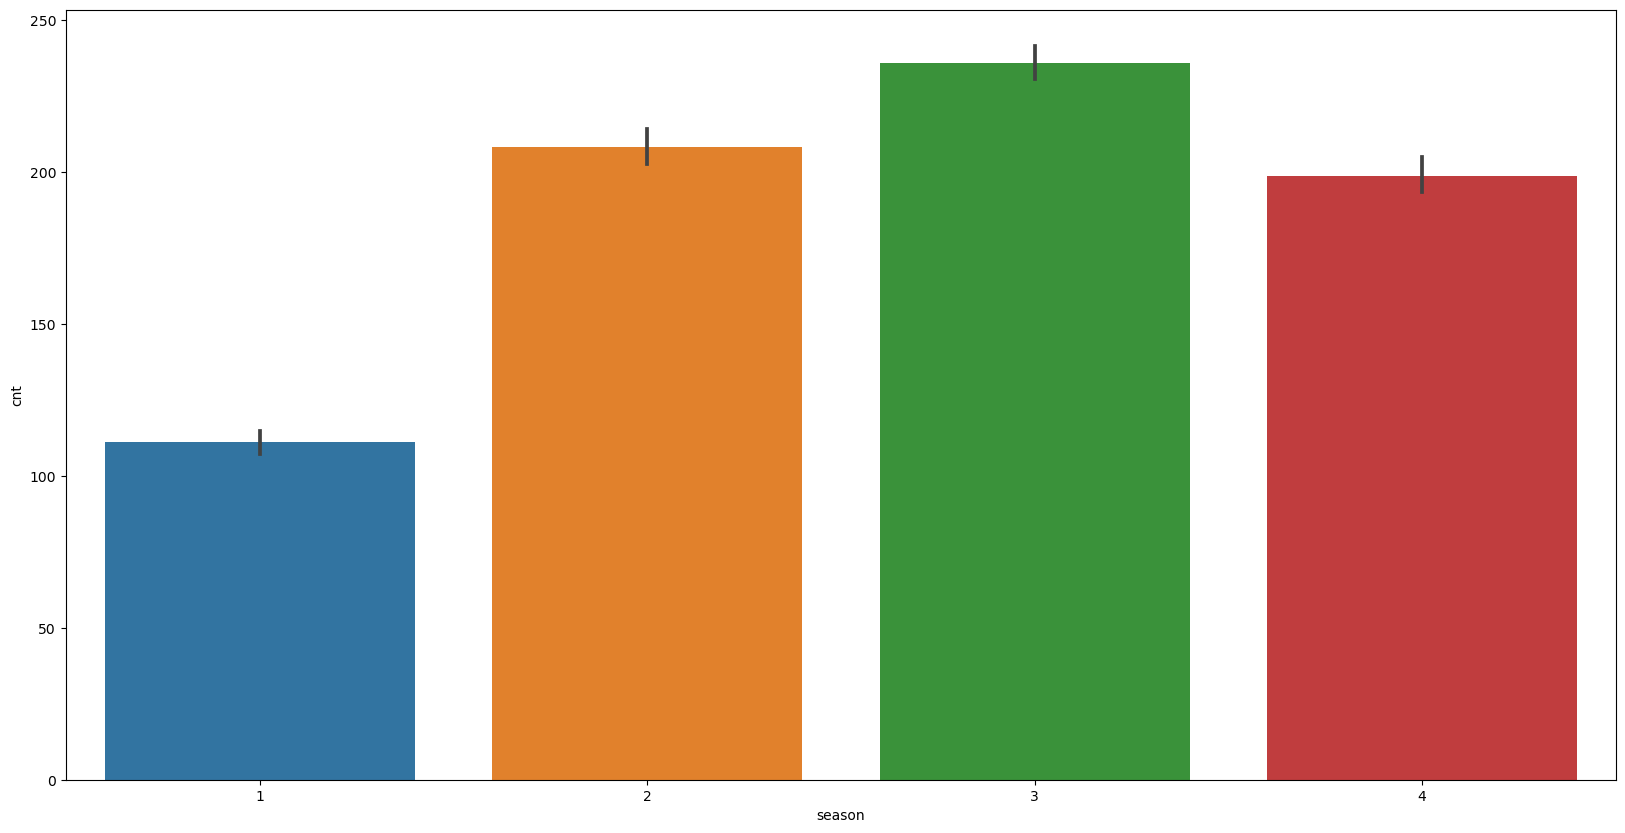

In [26]:
# 1:winter, 2:spring, 3:summer, 4:fall
plt.figure(figsize=(20,10))
sns.barplot(x='season',y='cnt',data=bike1)

* Seeing above graph we can say that in summer season bike rental count increase and in winter season bike rental count is less.

<Axes: xlabel='temp', ylabel='cnt'>

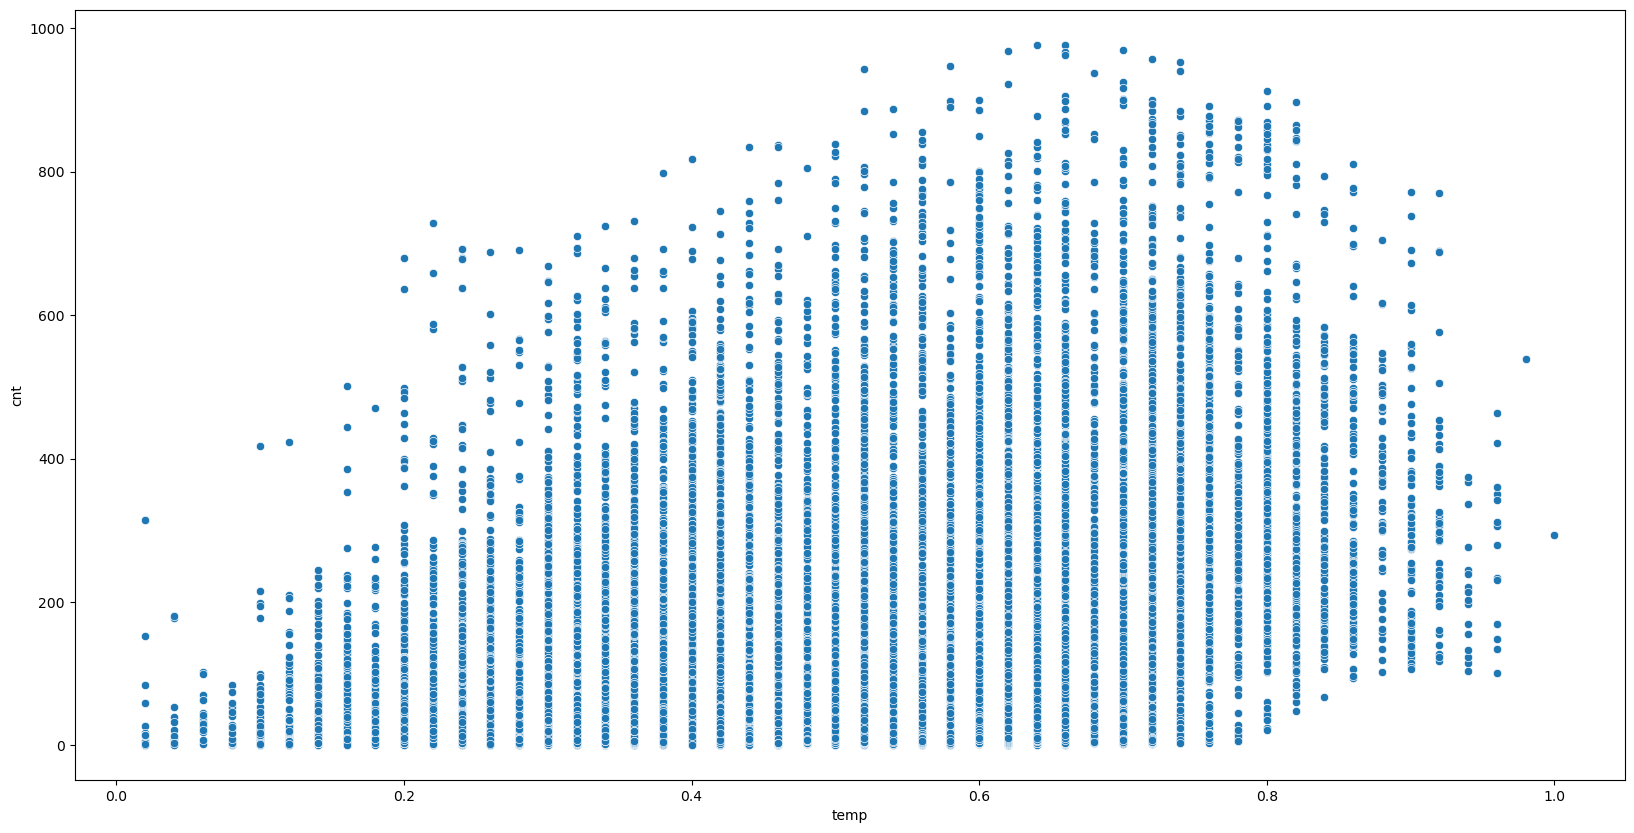

In [27]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='temp',y='cnt',data=bike1)

* If temperature is increased bike rental count is  also increase there is positive correlation between temp and cnt.

* If temp is increased bike rental count is also increase there is positive correlation between atemp and cnt

<Axes: xlabel='windspeed', ylabel='cnt'>

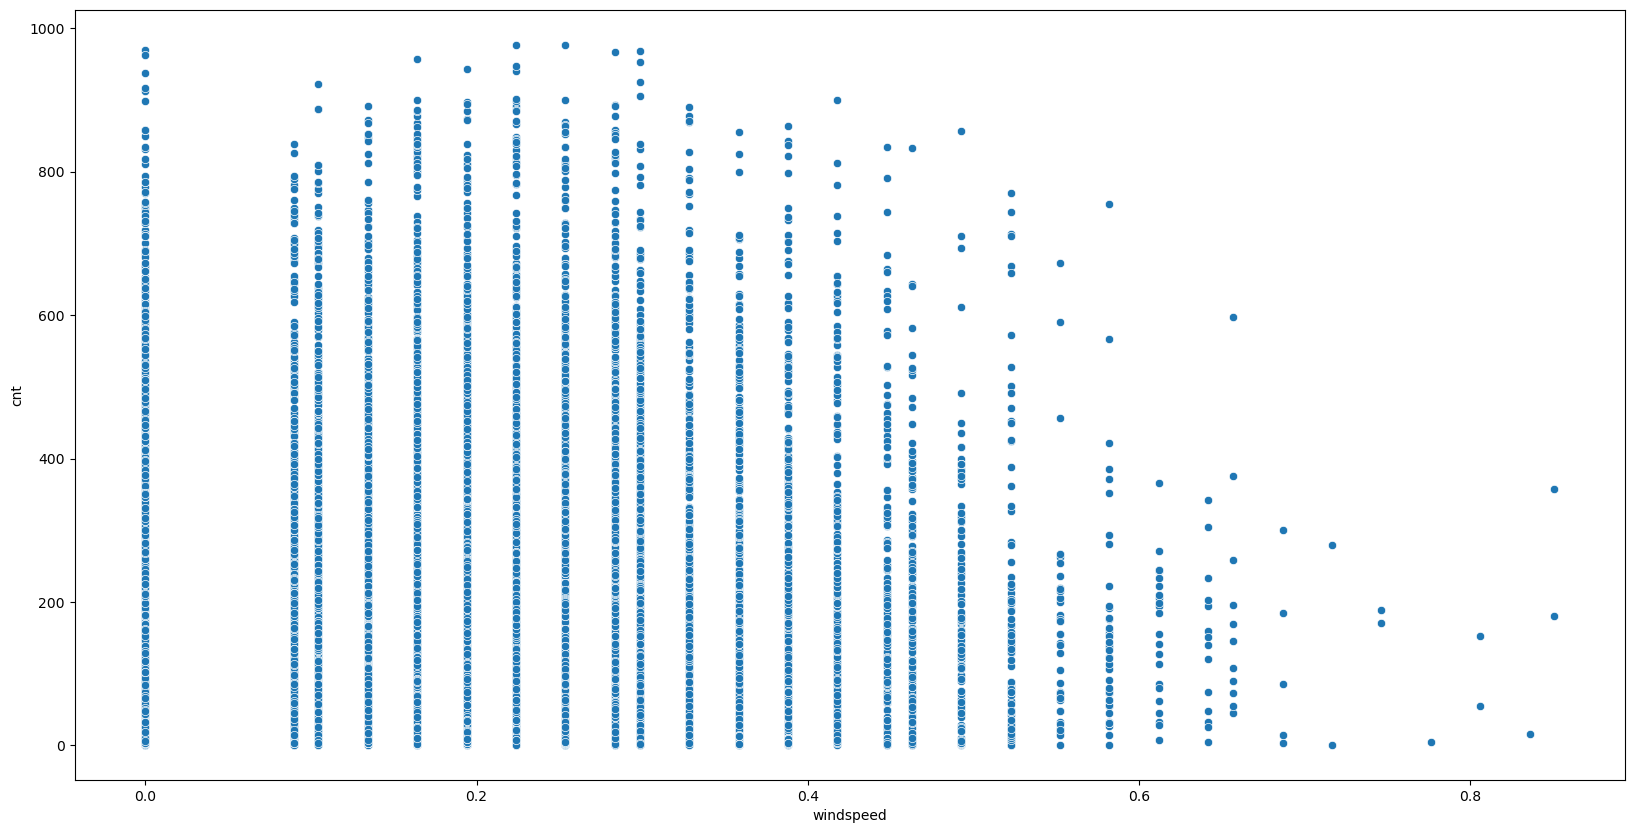

In [28]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='windspeed',y='cnt',data=bike1)

* If wind speed is increased bike rental count is  decrease.

* If wind speed range have  between 0.1 to 0.4 then bike rental count is high.

<Axes: xlabel='holiday', ylabel='cnt'>

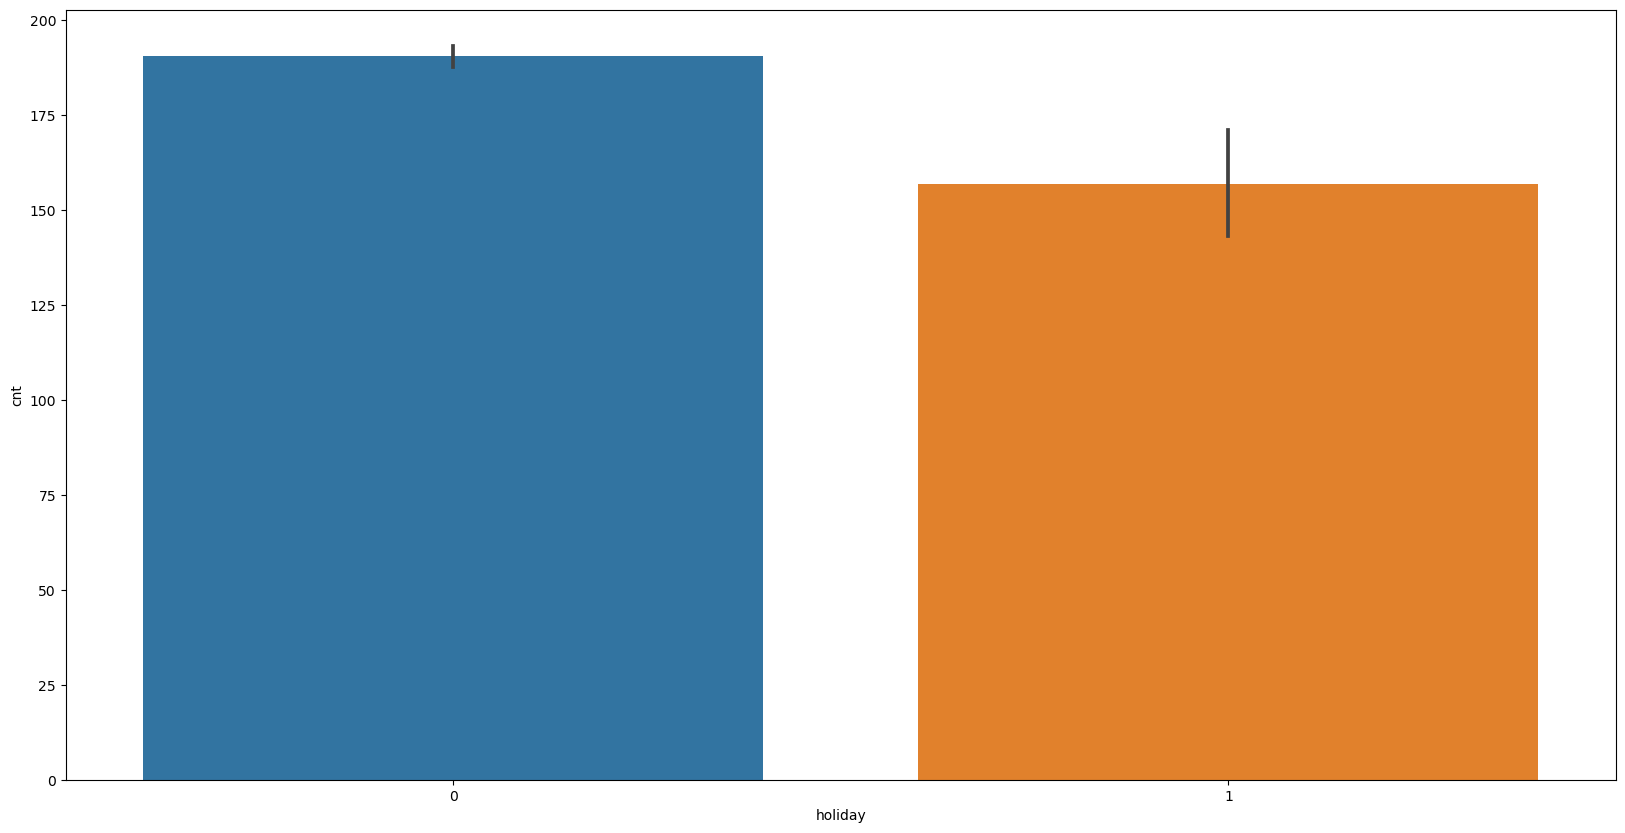

In [29]:
plt.figure(figsize=(20,10))
sns.barplot(x='holiday',y='cnt',data=bike1)

* if day is not holiday then bike rental count is increased.

<Axes: xlabel='workingday', ylabel='cnt'>

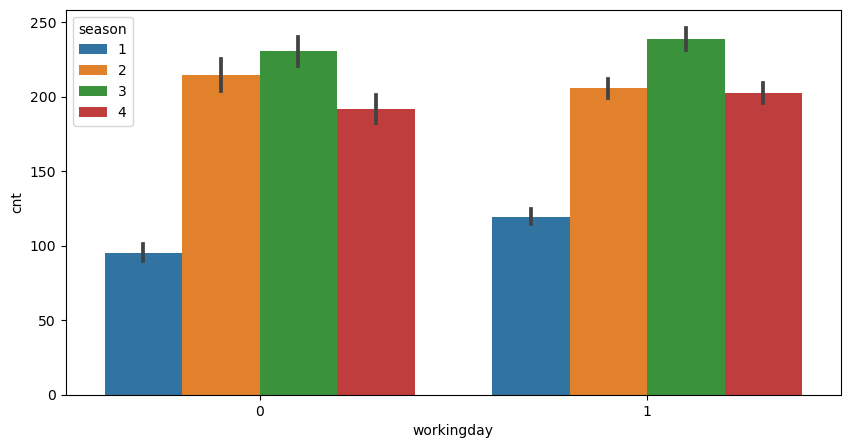

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(x='workingday',y='cnt',data=bike1,hue='season')

* In summer season or months of 6 to 9 bike rental count increase.

<Axes: xlabel='weathersit', ylabel='cnt'>

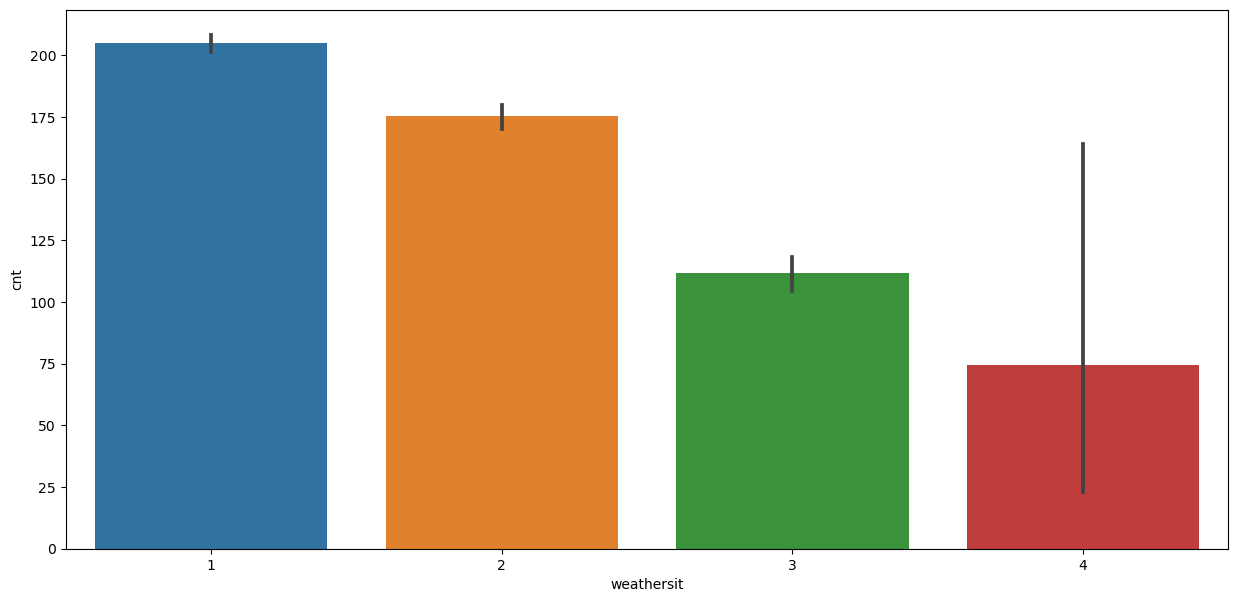

In [31]:
# - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# - 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog

plt.figure(figsize=(15,7))
sns.barplot(x='weathersit',y='cnt',data=bike1,)

* If weathersit is Clear, Few clouds, Partly cloudy and Partly cloudy than bike rental count is increase.

##  EDA

In [32]:
# Checking ull value present in dataset or not.
bike1.isnull().sum()

season        0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
cnt           0
dtype: int64

* No null value present in dataset.

<Axes: >

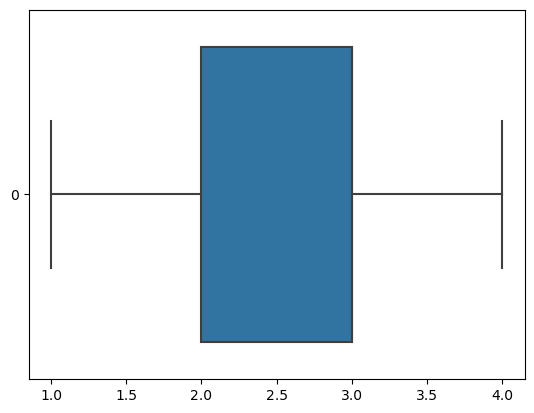

In [33]:
# Checking outlier
sns.boxplot(bike1['season'],orient='h')

<Axes: >

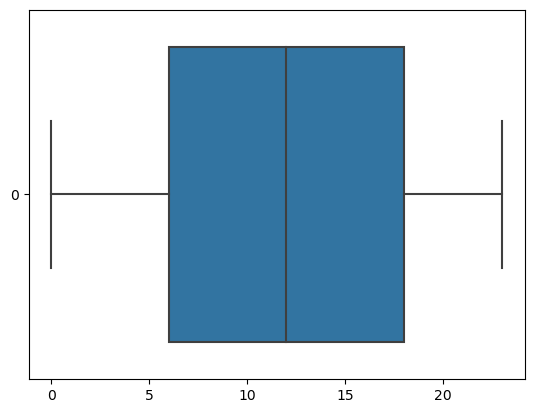

In [34]:
sns.boxplot(bike1['hr'],orient='h')

<Axes: >

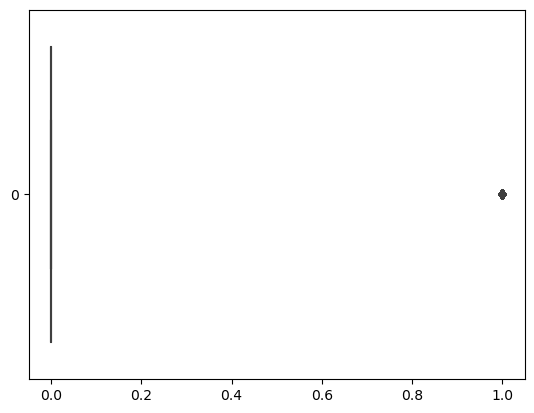

In [35]:
sns.boxplot(bike1['holiday'],orient='h')

<Axes: >

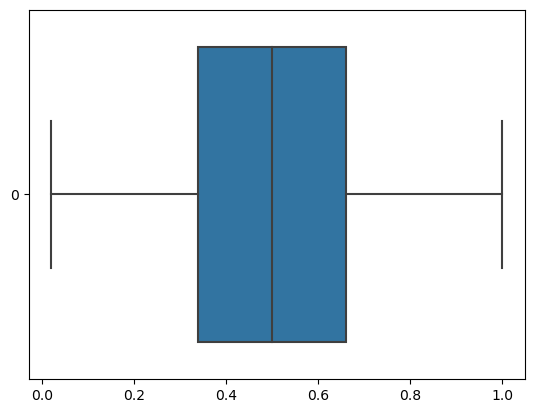

In [36]:
sns.boxplot(bike1['temp'],orient='h')

<Axes: >

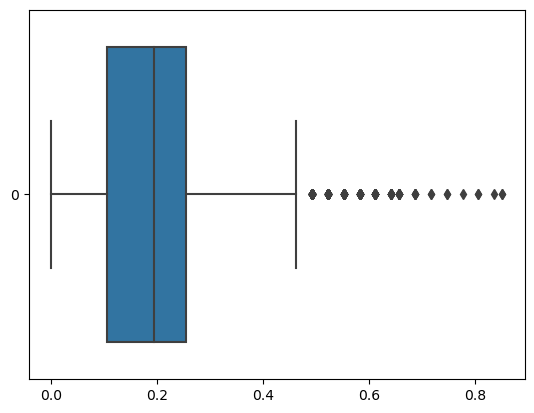

In [37]:
sns.boxplot(bike1['windspeed'],orient='h')

* Holiday and windspeed have outlier

####  Handling Outlier using IQR

In [38]:
# Interquartile range (IQR)  of Fc Feature
IQR = stats.iqr(bike1.windspeed, interpolation = 'midpoint')
IQR

0.1492

In [39]:
## min and max limit calculation
# First quartile (Q1)
Q1 = bike1.windspeed.quantile(0.25)
# Third quartile (Q3)
Q3 =bike1.windspeed.quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR
print(min_limit)
max_limit=Q3 +1.5*IQR
print(max_limit)

-0.1193
0.4775


In [40]:
## filetring the data
bike1.loc[bike1['windspeed'] > max_limit]

,season,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
175,1,14,0,6,0,1,0.20,0.32,0.4925,95
178,1,17,0,6,0,1,0.16,0.37,0.5522,69
194,1,9,0,0,0,1,0.12,0.46,0.5224,19
196,1,11,0,0,0,1,0.16,0.40,0.5224,49
265,1,12,0,3,1,1,0.20,0.47,0.5821,55
...,...,...,...,...,...,...,...,...,...,...
17327,1,20,0,6,0,2,0.30,0.56,0.5522,66
17328,1,21,0,6,0,2,0.28,0.56,0.4925,60
17341,1,10,0,0,0,1,0.26,0.41,0.5821,122
17343,1,12,0,0,0,1,0.28,0.36,0.5821,144


In [41]:
# puting mean becuase data is normally distributed.
bike1.loc[bike1['windspeed'] > max_limit,'windspeed']=np.mean(bike1.windspeed)

<Axes: >

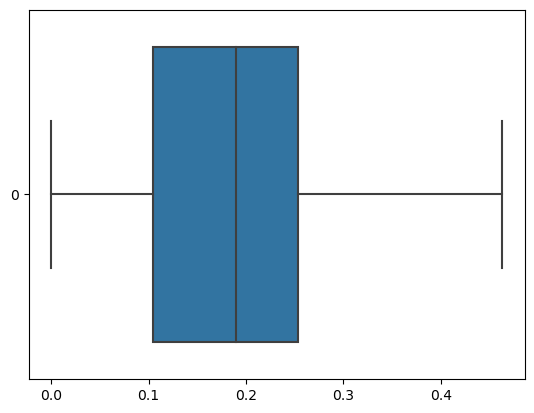

In [42]:
## Cheking
sns.boxplot(bike1['windspeed'],orient='h')

In [43]:
bike1=bike1[np.abs(bike1['cnt']) - bike1['cnt'].mean()  <=(3 * bike1['cnt'].std())]

<Axes: >

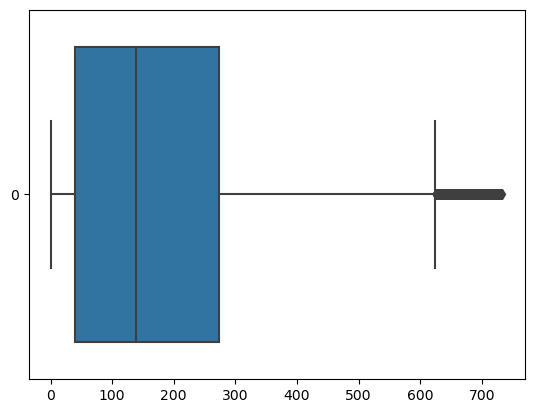

In [44]:
sns.boxplot(bike1['cnt'], orient='h')

<Axes: xlabel='cnt', ylabel='Density'>

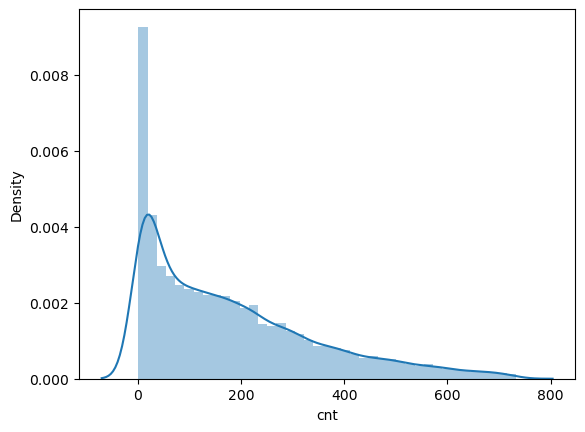

In [46]:
sns.distplot(bike1['cnt'])

In [47]:
# left skewed

In [48]:
# applying log log transformation

In [49]:
bike1['cnt']=np.log1p(bike1['cnt'])

<Axes: xlabel='cnt', ylabel='Density'>

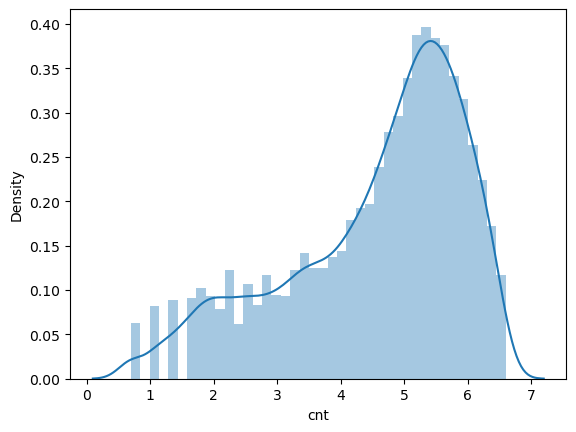

In [50]:
sns.distplot(bike1['cnt'])

In [51]:
# graph is almost  guassian 

In [52]:
from sklearn.preprocessing import MinMaxScaler
def scaling(df):
    scaler=MinMaxScaler()
    num_cols=['temp','hum','windspeed']
    df[num_cols]=scaler.fit_transform(df[num_cols])
    return df

In [53]:
#checking correaltion

In [54]:
def correlation(bike1,threshold):
    col_corr=set()  # creating empty set
    corr_matrix = bike1.corr()
    for i in range(len(corr_matrix.columns)): #abs for absolute error in case
        for j in range(i):
            if corr_matrix.iloc[i,j] > threshold:
                colname=corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr

In [55]:
corr_feature=correlation(bike1,0.85)
len(set(corr_feature))

0

In [56]:
corr_feature

set()

## Train and Test split

In [57]:
x=bike1.drop(['cnt'],axis=1)
y=bike1['cnt']

In [58]:
from sklearn.model_selection import train_test_split

# Assuming you have your data 'x' and 'y' defined
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


In [59]:
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [60]:
#Checking X_train
x_train.head()

,season,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed
1686,1,21,0,2,1,3,0.32,0.81,0.1045
3881,2,15,0,3,1,1,0.76,0.27,0.0000
8746,1,6,0,4,1,2,0.20,0.75,0.1343
4215,3,13,0,3,1,1,0.80,0.31,0.3284
11997,2,2,0,0,0,1,0.56,0.52,0.0000


In [61]:
#Checking X_test
x_test.head()

,season,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed
15093,4,2,0,3,1,2,0.58,0.64,0.2836
16861,4,8,0,1,1,2,0.42,1.00,0.2537
6714,4,8,0,3,1,2,0.54,0.88,0.3881
13887,3,20,0,1,1,1,0.76,0.66,0.1642
6224,3,22,0,3,1,2,0.62,0.94,0.0000


In [62]:
#Checking y_train
y_train.head()

1686     4.025352
3881     5.105945
8746     4.369448
4215     5.446737
11997    4.595120
Name: cnt, dtype: float64

In [63]:
#Checking y_train
y_test.head()

15093    2.890372
16861    6.371612
6714     6.003887
13887    6.126869
6224     4.852030
Name: cnt, dtype: float64

In [64]:
x_test.shape

(4284, 9)

In [65]:
x_train.shape

(12851, 9)

**Scaling**
It aims to standardize or normalize the numerical features of a dataset. It involves transforming the data so that it falls within a specific range or distribution.It can improve model convergence, accuracy, and generalization across a wide range of machine learning tasks. 

scaler=StandardScaler()

x_train_s=scaler.fit_transform(x_train)

x_test_s=scaler.transform(x_test)

In [66]:
x_train=scaling(x_train)
X_test=scaling(x_test)

****Model Building*****

**Linear Regression**

In [67]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [68]:
lr_p_t=lr.predict(x_test)

In [69]:
r2score=r2_score(y_test,lr_p_t)
r2score

0.45484669409634815

In [70]:
# Calculate the number of observations (n) and the number of predictors (k)
n = len(y_test)
k = x_test.shape[1]
print(n, k)

# Display the R-squared score
print("R-squared (R2) score:", r2score)


4284 9
R-squared (R2) score: 0.45484669409634815


In [71]:
# Calculate the adjusted R-squared (adjusted R2)
adjusted_r2 = 1 - (1 -  0.5752306557094624) * (4345 - 1) / (4345 - 10 - 1)
#adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print("R-squared (R2) Score:", r2score)
print("Adjusted R-squared (Adjusted R2) Score:", adjusted_r2)



R-squared (R2) Score: 0.45484669409634815
Adjusted R-squared (Adjusted R2) Score: 0.5742505695435867


In [72]:
import math
print(mean_squared_error(y_test,lr_p_t)) 
print(math.sqrt(mean_squared_error(y_test,lr_p_t)))

1.0742792101951764
1.0364744136712571


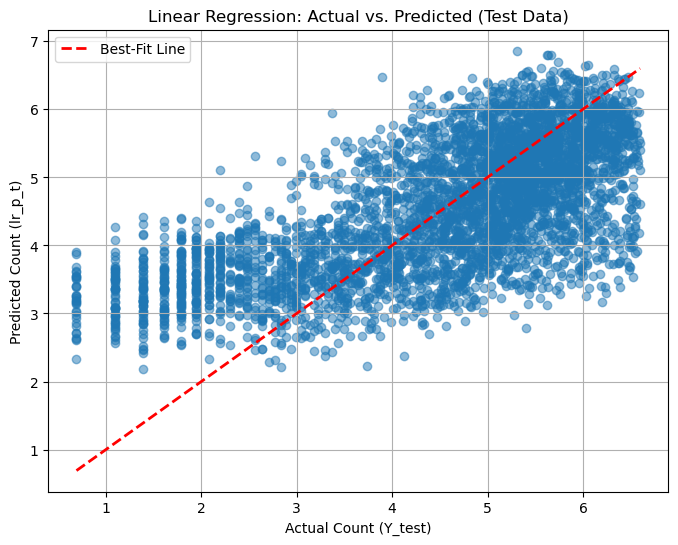

In [159]:
import matplotlib.pyplot as plt

# Scatter plot for test data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_p_t, alpha=0.5)
plt.title('Linear Regression: Actual vs. Predicted (Test Data)')
plt.xlabel('Actual Count (Y_test)')
plt.ylabel('Predicted Count (lr_p_t)')
plt.grid(True)

# Plot the best-fit line (y = x)
plt.plot([min(y_test.values), max(y_test.values)], [min(y_test.values), max(y_test.values)], color='red', linestyle='--', linewidth=2, label='Best-Fit Line')

# Add a legend
plt.legend()

# Show the plot
plt.show()


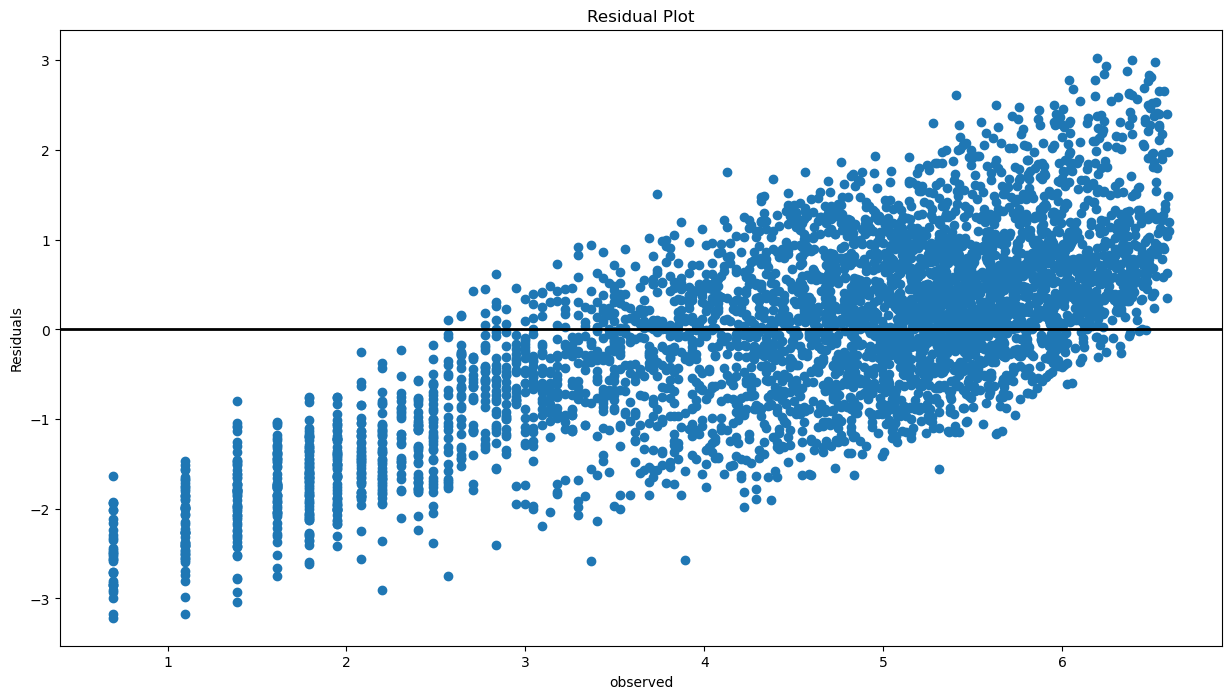

In [74]:
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_test,y_test-lr_p_t)
ax.axhline(lw=2,color="black")
ax.set_xlabel("observed")
ax.set_ylabel("Residuals")
ax.title.set_text("Residual Plot")
plt.show()

****DecisionTree****






In [75]:
dt=DecisionTreeRegressor()

In [76]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [77]:
dt_p_t=dt.predict(x_test)

In [78]:
r2score=r2_score(y_test,dt_p_t)
r2score

0.8412498445204923

In [79]:
dt_p_train=dt.predict(x_train)

In [80]:
r2score=r2_score(y_train,dt_p_train)
r2score

0.9998260658075149

In [81]:
# Calculate the number of observations (n) and the number of predictors (k)
n = len(y_test)
k = x_test.shape[1]
print(n, k)

# Display the R-squared score
print("R-squared (R2) score:", r2score)


4284 9
R-squared (R2) score: 0.9998260658075149


In [82]:
# Calculate the adjusted R-squared (adjusted R2)
adjusted_r2 = 1 - (1 -r2score) * (4345 - 1) / (4345 - 10 - 1)
#adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print("R-squared (R2) Score:",r2score)
print("Adjusted R-squared (Adjusted R2) Score:", adjusted_r2)



R-squared (R2) Score: 0.9998260658075149
Adjusted R-squared (Adjusted R2) Score: 0.9998256644826591


In [83]:
import math
print(mean_squared_error(y_test,dt_p_t)) 
print(math.sqrt(mean_squared_error(y_test,dt_p_t)))

0.3128330871335262
0.5593148372191875


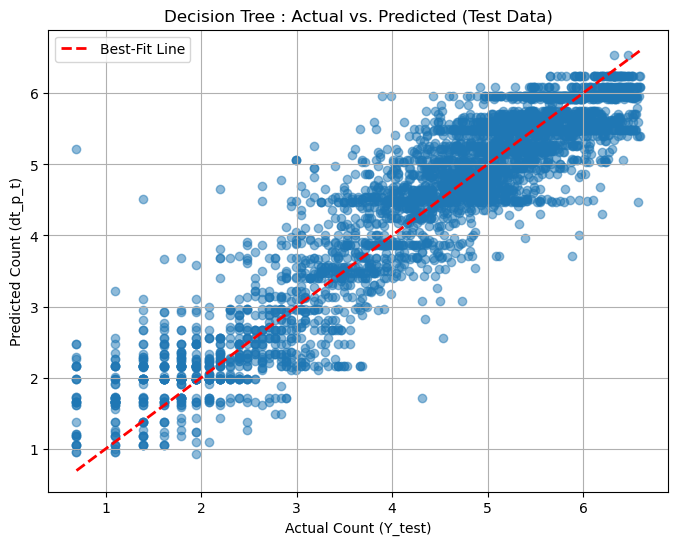

In [171]:
import matplotlib.pyplot as plt

# Scatter plot for test data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, dt_p_t, alpha=0.5)
plt.title('Decision Tree : Actual vs. Predicted (Test Data)')
plt.xlabel('Actual Count (Y_test)')
plt.ylabel('Predicted Count (dt_p_t)')
plt.grid(True)

# Add a line for perfect predictions
plt.plot([min(y_test.values), max(y_test.values)], [min(y_test.values), max(y_test.values)], color='red', linestyle='--', linewidth=2, label='Best-Fit Line')

# Add a legend
plt.legend()

# Show the plot
plt.show()

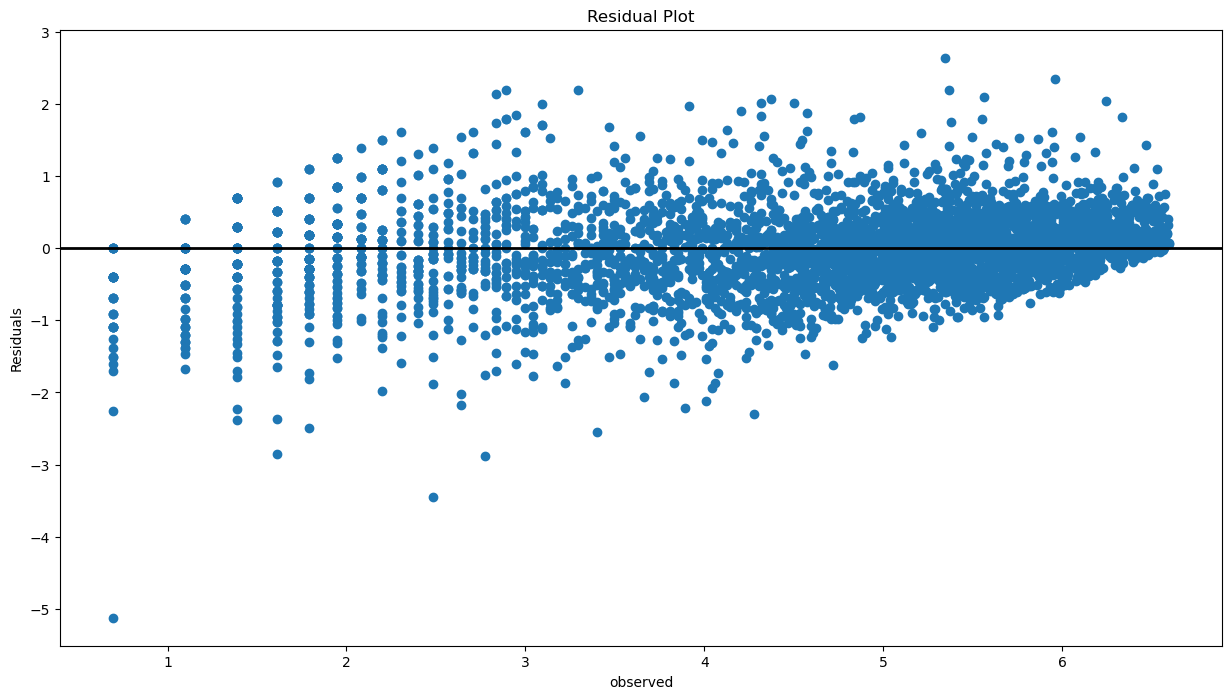

In [84]:
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_test,y_test-dt_p_t)
ax.axhline(lw=2,color="black")
ax.set_xlabel("observed")
ax.set_ylabel("Residuals")
ax.title.set_text("Residual Plot")
plt.show()

#### Hyperparameters of DecisionTree

In [85]:
params = {
    "criterion":('friedman_mse', 'absolute_error', 'poisson'), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 10))), #depth of tree range from 1 to 10
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 10)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 10
}

In [86]:
dt=DecisionTreeRegressor()
tree_cv = GridSearchCV(dt, params, scoring="r2", n_jobs=-1, verbose=1, cv=3)

In [87]:
tree_cv.fit(x_train,y_train)
best_params=tree_cv.best_params_
print(best_params)

Fitting 3 folds for each of 1458 candidates, totalling 4374 fits
{'criterion': 'friedman_mse', 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 4, 'splitter': 'random'}


In [88]:
dt1=DecisionTreeRegressor(**best_params)

In [89]:
dt1.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=9, min_samples_leaf=3,
                      min_samples_split=4, splitter='random')

In [90]:
dt_p_t=dt1.predict(x_test)

In [91]:
r2score=r2_score(y_test,dt_p_t)
r2score

0.8563193500761239

In [92]:
dt_p_train=dt1.predict(x_train)

In [93]:
r2score=r2_score(y_train,dt_p_train)
r2score

0.8821811406723215

In [94]:
# Calculate the number of observations (n) and the number of predictors (k)
n = len(y_test)
k = x_test.shape[1]
print(n, k)

# Display the R-squared score
print("R-squared (R2) score:", r2score)


4284 9
R-squared (R2) score: 0.8821811406723215


In [95]:
# Calculate the adjusted R-squared (adjusted R2)
adjusted_r2 = 1 - (1 - 0.9116717974040748) * (4345 - 1) / (4345 - 10 - 1)
#adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print("R-squared (R2) Score:", r2score)
print("Adjusted R-squared (Adjusted R2) Score:", adjusted_r2)


R-squared (R2) Score: 0.8821811406723215
Adjusted R-squared (Adjusted R2) Score: 0.9114679944446933


In [96]:
import math
print(mean_squared_error(y_test,dt_p_t)) 
print(math.sqrt(mean_squared_error(y_test,dt_p_t)))

0.28313711656704316
0.5321063019426129


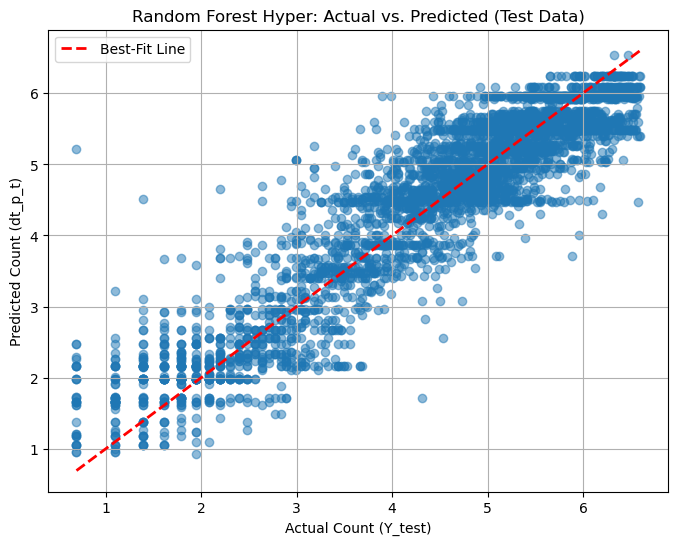

In [169]:
import matplotlib.pyplot as plt

# Scatter plot for test data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, dt_p_t, alpha=0.5)
plt.title('Random Forest Hyper: Actual vs. Predicted (Test Data)')
plt.xlabel('Actual Count (Y_test)')
plt.ylabel('Predicted Count (dt_p_t)')
plt.grid(True)

# Add a line for perfect predictions
plt.plot([min(y_test.values), max(y_test.values)], [min(y_test.values), max(y_test.values)], color='red', linestyle='--', linewidth=2, label='Best-Fit Line')

# Add a legend
plt.legend()

# Show the plot
plt.show()


### Ridge Regression

In [98]:
rr=Ridge()

In [99]:
rr.fit(x_train,y_train)

Ridge()

In [100]:
rr_p_t=rr.predict(x_test)

In [101]:
r2score=r2_score(y_test,rr_p_t)
r2score

0.4548713886589937

In [102]:
rr_p_train=rr.predict(x_train)

In [103]:
r2score=r2_score(y_train,dt_p_train)
r2score

0.8821811406723215

In [104]:
# Calculate the number of observations (n) and the number of predictors (k)
n = len(y_test)
k = x_test.shape[1]
print(n, k)

# Display the R-squared score
print("R-squared (R2) score:", r2score)


4284 9
R-squared (R2) score: 0.8821811406723215


In [105]:
# Calculate the adjusted R-squared (adjusted R2)
adjusted_r2 = 1 - (1 - 0.9116717974040748) * (4345 - 1) / (4345 - 10 - 1)

#adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print("R-squared (R2) Score:", r2score)
print("Adjusted R-squared (Adjusted R2) Score:", adjusted_r2)


R-squared (R2) Score: 0.8821811406723215
Adjusted R-squared (Adjusted R2) Score: 0.9114679944446933


In [106]:
import math
print(mean_squared_error(y_test,dt_p_t)) 
print(math.sqrt(mean_squared_error(y_test,dt_p_t)))

0.28313711656704316
0.5321063019426129


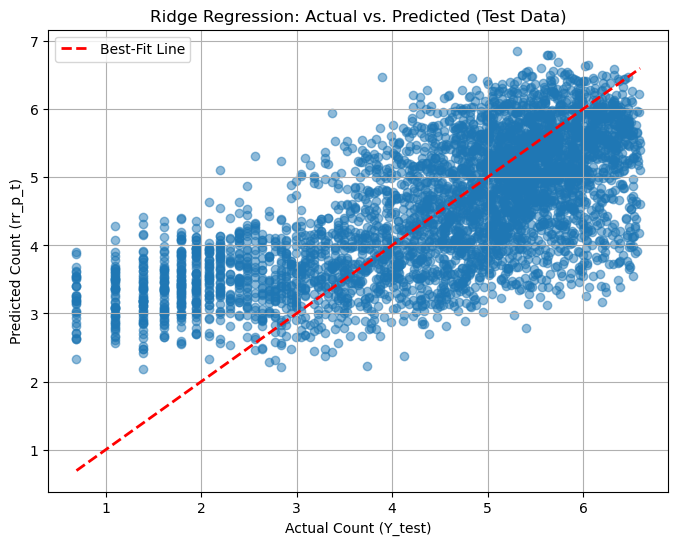

In [168]:
import matplotlib.pyplot as plt

# Scatter plot for test data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rr_p_t, alpha=0.5)
plt.title('Ridge Regression: Actual vs. Predicted (Test Data)')
plt.xlabel('Actual Count (Y_test)')
plt.ylabel('Predicted Count (rr_p_t)')
plt.grid(True)

# Add a line for perfect predictions
plt.plot([min(y_test.values), max(y_test.values)], [min(y_test.values), max(y_test.values)], color='red', linestyle='--', linewidth=2, label='Best-Fit Line')

# Add a legend
plt.legend()

# Show the plot
plt.show()


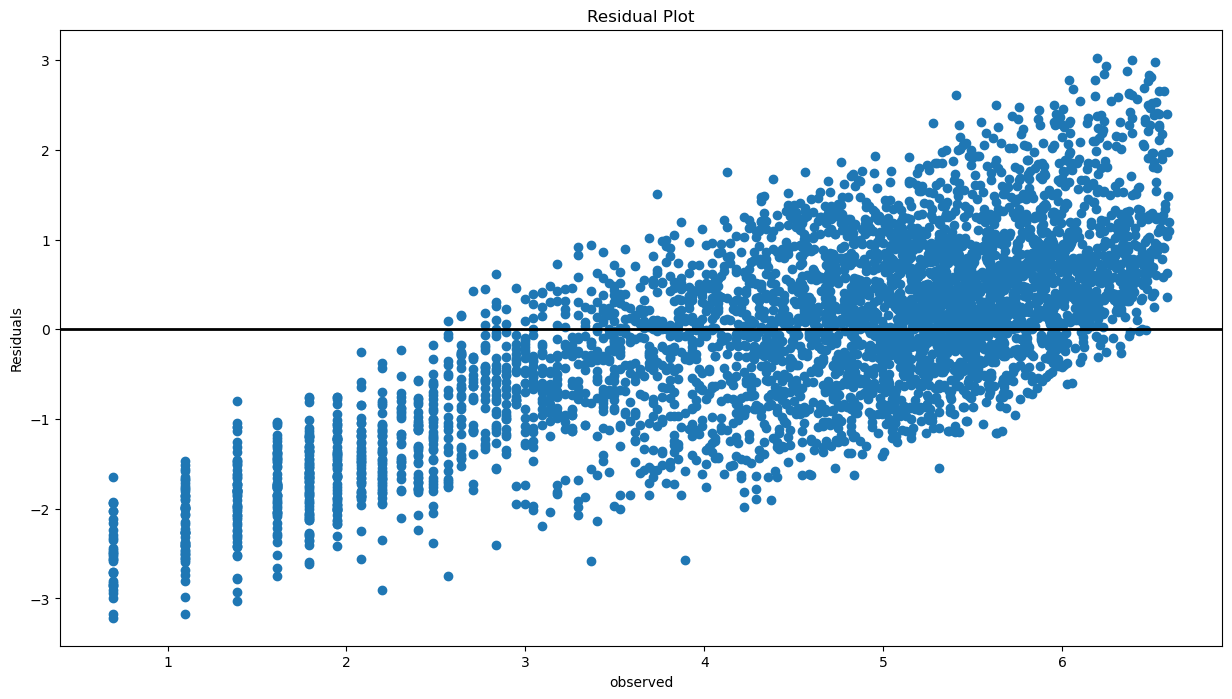

In [108]:
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_test,y_test-rr_p_t)
ax.axhline(lw=2,color="black")
ax.set_xlabel("observed")
ax.set_ylabel("Residuals")
ax.title.set_text("Residual Plot")
plt.show()

### RandomForest

In [109]:
rf=RandomForestRegressor()

In [110]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [111]:
rf_p_t=rf.predict(x_test)

In [112]:
r2score=r2_score(y_test,rf_p_t)
r2score

0.9159911745706399

In [113]:
rf_p_train=rf.predict(x_train)

In [114]:
r2score=r2_score(y_train,rf_p_train)
r2score

0.9889167209428369

In [115]:
# Calculate the number of observations (n) and the number of predictors (k)
n = len(y_test)
k = x_test.shape[1]
print(n, k)

# Display the R-squared score
print("R-squared (R2) score:", r2score)



4284 9
R-squared (R2) score: 0.9889167209428369


In [116]:
# Calculate the adjusted R-squared (adjusted R2)
adjusted_r2 = 1 - (1-0.9999613897672107) * (4345 - 1) / (4345 - 11 - 1)
#adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print("R-squared (R2) Score:", r2score)
print("Adjusted R-squared (Adjusted R2) Score:", adjusted_r2)



R-squared (R2) Score: 0.9889167209428369
Adjusted R-squared (Adjusted R2) Score: 0.9999612917490799


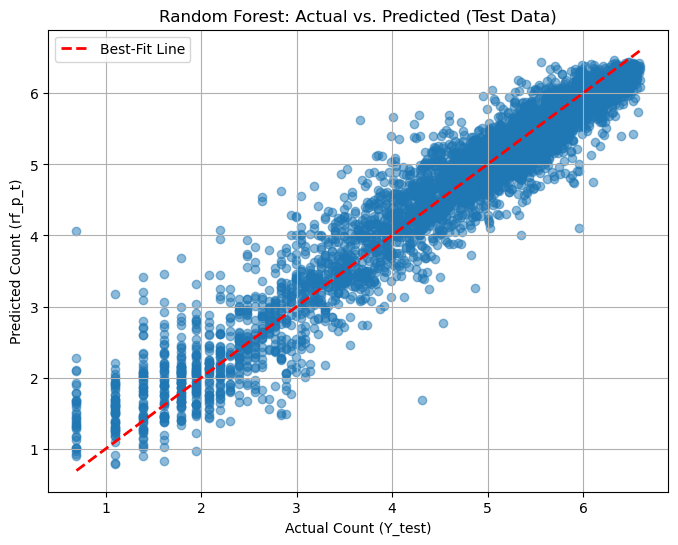

In [163]:
import matplotlib.pyplot as plt

# Scatter plot for test data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_p_t, alpha=0.5)
plt.title('Random Forest: Actual vs. Predicted (Test Data)')
plt.xlabel('Actual Count (Y_test)')
plt.ylabel('Predicted Count (rf_p_t)')
plt.grid(True)

# Add a line for perfect predictions
plt.plot([min(y_test.values), max(y_test.values)], [min(y_test.values), max(y_test.values)], color='red', linestyle='--', linewidth=2, label='Best-Fit Line')

# Add a legend
plt.legend()

# Show the plot
plt.show()


#### Hyperparameters of Random forest

In [118]:
from sklearn.model_selection import RandomizedSearchCV

In [119]:
param_grid = {
    'n_estimators': [100, 200],           # Number of trees in the forest
    'max_depth': [None, 10],              # Maximum depth of the trees
    'min_samples_split': [2, 5],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],          # Minimum number of samples required to be in a leaf node
    'bootstrap': [True, False]
}

In [120]:
rf_clf = RandomForestRegressor()

In [121]:
rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

In [122]:
rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_##it will give you best parameters 
print(f"Best paramters: {rf_best_params})")##printing  best parameters

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best paramters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True})


In [123]:
rf_clf1= RandomForestRegressor()

In [124]:
rf_clf1=RandomForestRegressor(**rf_best_params)

In [125]:
rf_clf1.fit(x_train,y_train)


RandomForestRegressor()

In [126]:
y_pred_rf_test=rf_clf1.predict(x_test)

In [127]:
r2score=r2_score(y_test,y_pred_rf_test)
r2score

0.9162510953103931

In [128]:
y_pred_rf_train=rf_clf1.predict(x_train)

In [129]:
r2score=r2_score(y_train,y_pred_rf_train)
r2score

0.9890605672236177

In [130]:
# Calculate the number of observations (n) and the number of predictors (k)
n = len(y_test)
k = x_test.shape[1]
print(n, k)

# Display the R-squared score
print("R-squared (R2) score:", r2score)


4284 9
R-squared (R2) score: 0.9890605672236177


In [131]:
# Calculate the adjusted R-squared (adjusted R2)
adjusted_r2 = 1 - (1 - 0.8542420221076565 ) * (4345 - 1) / (4345 - 9 - 1)

#adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print("R-squared (R2) Score:", r2score)
print("Adjusted R-squared (Adjusted R2) Score:", adjusted_r2)


R-squared (R2) Score: 0.9890605672236177
Adjusted R-squared (Adjusted R2) Score: 0.8539394103888489


In [132]:
import math
print(mean_squared_error(y_test,y_pred_rf_test)) 
print(math.sqrt(mean_squared_error(y_test,y_pred_rf_test)))

0.1650356078012354
0.4062457480408077


In [133]:
#accuracy of the model
rf_clf1_score=rf_clf1.score(x_train,y_train)
print('Accuracy of the model :',rf_clf1_score)

Accuracy of the model : 0.9890605672236177


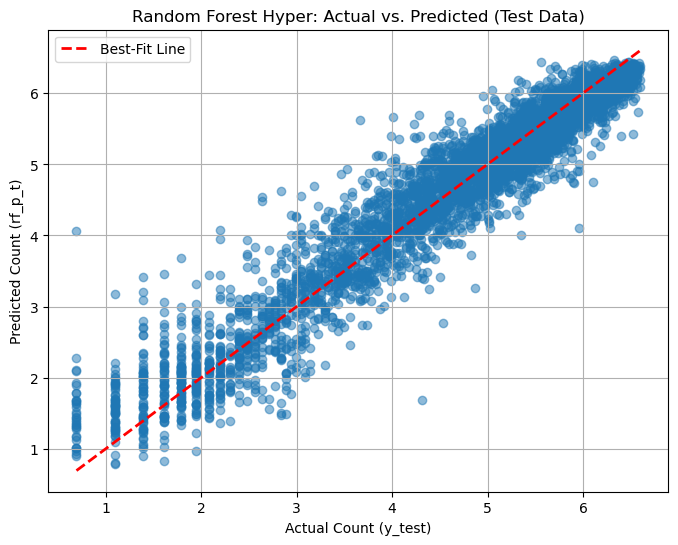

In [167]:
import matplotlib.pyplot as plt

# Scatter plot for test data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_p_t, alpha=0.5)
plt.title('Random Forest Hyper: Actual vs. Predicted (Test Data)')
plt.xlabel('Actual Count (y_test)')
plt.ylabel('Predicted Count (rf_p_t)')
plt.grid(True)

# Add a line for perfect predictions
plt.plot([min(y_test.values), max(y_test.values)], [min(y_test.values), max(y_test.values)], color='red', linestyle='--', linewidth=2, label='Best-Fit Line')

# Add a legend
plt.legend()

# Show the plot
plt.show()


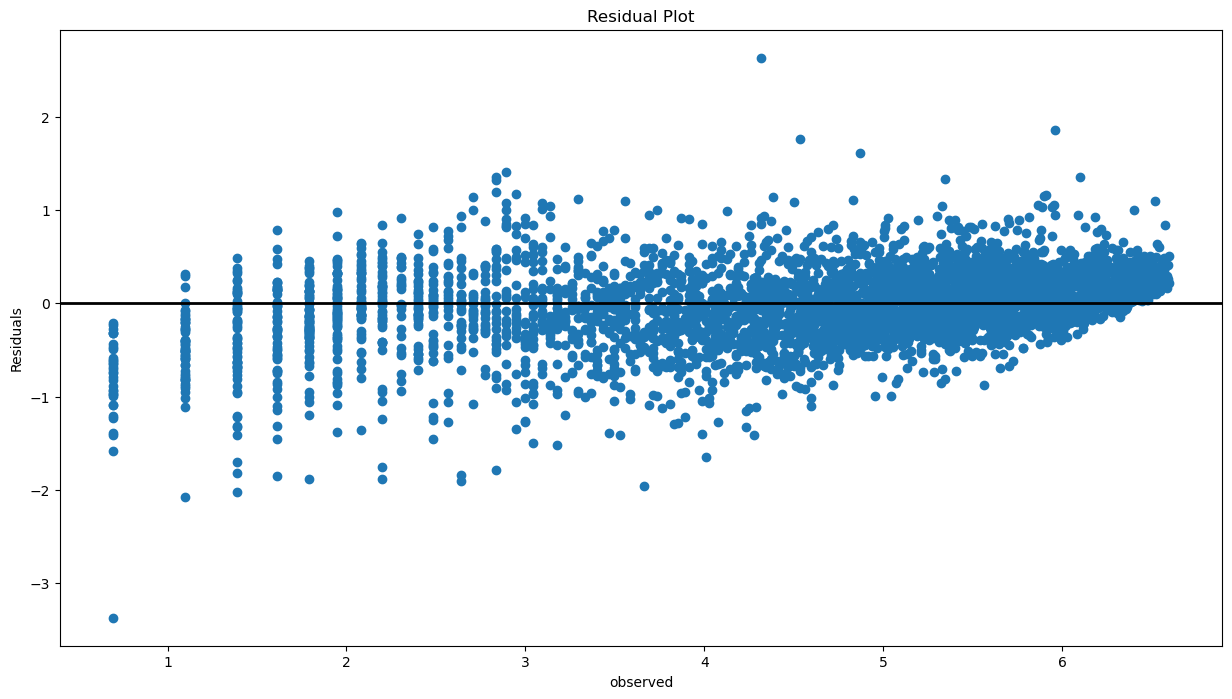

In [135]:
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_test,y_test- rf_p_t)
ax.axhline(lw=2,color="black")
ax.set_xlabel("observed")
ax.set_ylabel("Residuals")
ax.title.set_text("Residual Plot")
plt.show()

### Lasso Regression

In [138]:
### Lasso Regression

In [139]:
ls=Lasso()

In [141]:
ls.fit(x_train,y_train)

Lasso()

In [142]:
ls_p_t=ls.predict(x_test)

In [143]:
r2score=r2_score(y_test,ls_p_t)
r2score

0.30930684768665084

In [144]:
ls_p_train=ls.predict(x_train)

In [145]:
r2score=r2_score(y_train,ls_p_train)
r2score

0.30460185909187876

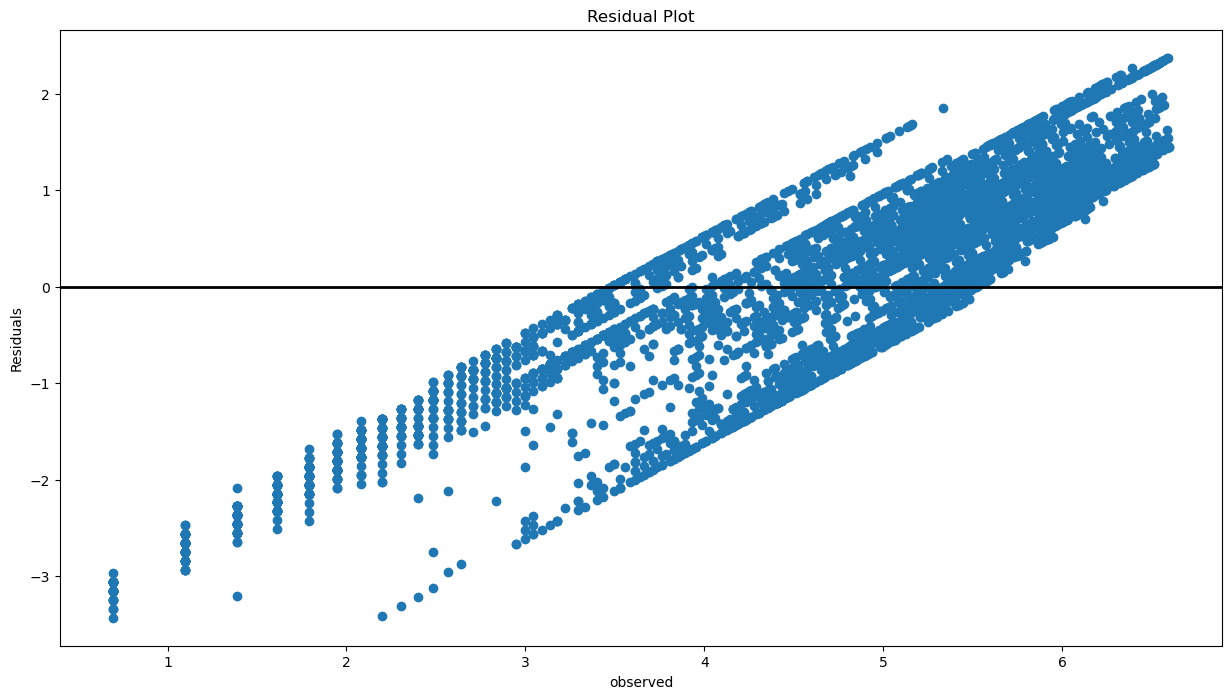

In [146]:
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_test,y_test-ls_p_t)
ax.axhline(lw=2,color="black")
ax.set_xlabel("observed")
ax.set_ylabel("Residuals")
ax.title.set_text("Residual Plot")
plt.show()

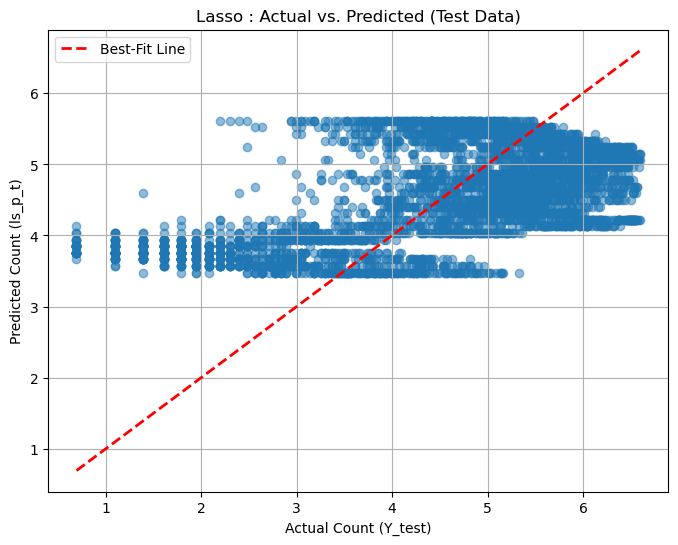

In [172]:
import matplotlib.pyplot as plt

# Scatter plot for test data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, ls_p_t, alpha=0.5)
plt.title('Lasso : Actual vs. Predicted (Test Data)')
plt.xlabel('Actual Count (Y_test)')
plt.ylabel('Predicted Count (ls_p_t)')
plt.grid(True)

# Add a line for perfect predictions
plt.plot([min(y_test.values), max(y_test.values)], [min(y_test.values), max(y_test.values)], color='red', linestyle='--', linewidth=2, label='Best-Fit Line')

# Add a legend
plt.legend()

# Show the plot
plt.show()


## Model Comparison Report
### Code to demonstrates the use of several regression algorithms to build predictive models and calculate their Root Mean Squared Error (RMSE) on a given dataset. 

In [149]:
models=[RandomForestRegressor(),DecisionTreeRegressor(),Lasso(),Ridge(),LinearRegression()]
model_names=['RandomForestRegressor','DecisionTreeRegressor','Lasso','Ridge','LinearRegression()']
rmse=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    rmse.append(np.sqrt(mean_squared_error(test_pred,y_test)))
d={'Modelling Algo':model_names,'RMSE':rmse}   
d

{'Modelling Algo': ['RandomForestRegressor',
  'DecisionTreeRegressor',
  'Lasso',
  'Ridge',
  'LinearRegression()'],
 'RMSE': [0.4062629048849974,
  0.5550247855208914,
  1.1666533588505434,
  1.036450938098492,
  1.0364744136712571]}

In [150]:
rmsle_frame=pd.DataFrame(d)
rmsle_frame

,Modelling Algo,RMSE
0,RandomForestRegressor,0.406263
1,DecisionTreeRegressor,0.555025
2,Lasso,1.166653
3,Ridge,1.036451
4,LinearRegression(),1.036474


## To calculates the R-squared (R2) score for each regression model on the given dataset.

In [157]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import r2_score


models = [RandomForestRegressor(), DecisionTreeRegressor(), Lasso(), Ridge(), LinearRegression()]
model_names = ['RandomForestRegressor', 'DecisionTreeRegressor', 'Lasso', 'Ridge', 'LinearRegression']



r2_scores = []  

for model, model_name in zip(models, model_names):
    model.fit(x_train, y_train)
    test_pred = model.predict(x_test)
    r2 = r2_score(y_test, test_pred)
    r2_scores.append(r2)
    
results = {'Modelling Algo': model_names, 'r2square': r2_scores}
print(results)

{'Modelling Algo': ['RandomForestRegressor', 'DecisionTreeRegressor', 'Lasso', 'Ridge', 'LinearRegression'], 'r2square': [0.9164719242685619, 0.8443256817003617, 0.30930684768665084, 0.4548713886589937, 0.45484669409634815]}


In [158]:
r2square_frame=pd.DataFrame(results)
r2square_frame

,Modelling Algo,r2square
0,RandomForestRegressor,0.916472
1,DecisionTreeRegressor,0.844326
2,Lasso,0.309307
3,Ridge,0.454871
4,LinearRegression,0.454847


# Conclusion

 1.According to RMSE, the RandomForestRegressor is the best model for the given dataset and regression task, as it has the lowest RMSE and, therefore, the best predictive accuracy.
 
 
2.IF we take R2score  RandomForestRegressor is the best model for the given dataset and regression task, as it has the highest R2 score, indicating the best explanatory power and predictive performance.


3.By seeing a difference r2 score of x_train and x_test  we have derived that difference is less when we compared with the differnce of the other alogorithms we use.

## Report on Challenges faced
### To create a report which should include challenges you faced on data and what technique was used with proper reasoning.

1.Selecting the datasets -  we have two datasets: ('day.csv'),('hour.csv') 

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
So we have to figured out which datset we have to select, so we have selected hour.csv

Reason to select 'hour.csv' : hour.csv contains all the columns that was present in day.csv and also 
hr which is not present in day.csv.



2.Droping the unnecessary columns- We have 17 columns out of these some of the columns are categorical and some of the continous columns. So we need to go through each column that which one to drop.

So for this we have taken the 'CORRELATION_MATRIX'. Correlation matrix can help determine whether to drop or remove unused or unrelated features in a dataset by examining the relationships between features (variables). 

So far we have dropped 7 columns out of 17 columns : ('instant','dteday','registered','casual','yr','mnth','atemp').



3.Normalizing the columns - to covert left screwed graphs to guassian distribution to make it more symmetric and to reduce the impact of extreme values.



4.Difference in x train and y train-  For determining the model performance whether it is overfitted or underfitted. so much values is there and we have work to less that error.


5.Model selection: we have to select best fit model based on r2score, adjusted r2score, rmse, mse, mae and also plotted graph for 
prediction of the dataset.


6.Outliers - To check for each columns whether they have outliers or not.
Whether and how to remove outliers - Methods : IQR , Empirical rule , Triming , capping.


